<a href="https://colab.research.google.com/github/aayurchik/car-price-app/blob/main/HW1_Regression_with_inference_base_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [121]:
import pandas as pd

In [122]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)



### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [123]:
#  Отобразите 30 случайных строк тренировочного датасета.
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [124]:
#  Отобразите первые 5 объектов тестового датасета
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [125]:
# последние 5 объектов тестового датасета
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [126]:
#  Посмотрите, есть ли в датасете пропуски.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [127]:
#  Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
df_train.columns[df_train.isnull().any()].to_list()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [128]:
df_test.columns[df_test.isnull().any()].to_list()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [129]:
#  Посмотрите, есть ли в данных явные дубликаты
# сколько повторяющихся значений есть в каждой колонке
n_rows = df_train.shape[0]
dup_per_col = (n_rows - df_train.nunique()).sort_values(ascending=False)
dup_per_col

,0
transmission,6997
seller_type,6996
fuel,6995
owner,6994
seats,6990
year,6970
engine,6879
max_power,6683
mileage,6613
torque,6580


In [130]:
df_train.duplicated().sum()

np.int64(985)

In [131]:
n_rows = df_test.shape[0]
dup_per_col = (n_rows - df_test.nunique()).sort_values(ascending=False)
dup_per_col

,0
transmission,998
seller_type,997
fuel,996
owner,995
seats,994
year,976
engine,912
max_power,818
torque,774
mileage,763


In [132]:
df_test.duplicated().sum()

np.int64(62)

Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?  


*   Можно оценить столбцы и тип данных, единицы измерения, контекст датасета, форматы заполнения столбцов. Примерно прикинуть разброс цифр, наличие дубликатов, ошибок, пропусков (но не до конца). Из интересного вижу, что у некоторых столбцов единицы измерения прописаны прям внутри значений у числовых переменных.
*   Нельзя точно сказать где дубликаты, ошибки, пропуски. Описательные статистики, выбросы


 Достаточно ли метода duplicated для анализа дубликатов? Почему?  


*   Недостаточно, надо смотреть тип данных. Вдруг там булево значение?
 Метод ищет только полные дубликаты строк, а дубли по колонкам тоже важны + строки могут быть одинаковыми, но в ячейках встречаться опечатки или разные форматы



In [133]:
#  Постройте дашборд, используя ydata-profilling
# !pip install ydata-profiling
import numpy as np
# from ydata_profiling import ProfileReport
# import warnings
# warnings.filterwarnings('ignore')
# from IPython.display import display, HTML
# Закомментила, чтобы залить на гит
# # train
# profile_train = ProfileReport(
#     df_train,
#     title="EDA Train Dataset",
#     explorative=True)

# # test
# profile_test = ProfileReport(
#     df_test,
#     title="EDA Test Dataset",
#     explorative=True)

# profile_train

In [150]:
# profile_test

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [135]:
# ['mileage', 'engine', 'max_power', 'torque', 'seats'] - столбцы с пропусками
# Приведение числовых столбцов к float
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].str.extract(r'([\d.]+)').astype(float)
    df_test[col] = df_test[col].str.extract(r'([\d.]+)').astype(float)
# Дропнем torque
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])
# Заполняем пропуски медианой
num_cols = df_train.select_dtypes(include=[np.number]).columns
medians = df_train[num_cols].median()
df_train[num_cols] = df_train[num_cols].fillna(medians)
df_test[num_cols] = df_test[num_cols].fillna(medians)

# Проверка на пропуски
train_missing = df_train.isnull().sum().sum()
test_missing = df_test.isnull().sum().sum()
assert train_missing == 0, f"Ошибка в тренировочном наборе"
assert test_missing == 0, f"Ошибка в тестовом наборе"
print("Все пропуски заполнены")


Все пропуски заполнены


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [136]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
X_train = df_train.drop(columns=['selling_price'])
dupes_mask = X_train.duplicated(keep=False)
num_dupes = dupes_mask.sum()
num_dupes

np.int64(1799)

In [137]:
#  Отобразите такие объекты (0.15 балла)
if num_dupes > 0:
    print(df_train[dupes_mask].sort_values('name'))

                                      name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
3291        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
1568        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
361         Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
2652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner  mileage  en

In [138]:
# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [139]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)
df_train = df_train.reset_index(drop=True)
df_train.index

RangeIndex(start=0, stop=5840, step=1)

In [140]:
df_train.shape

(5840, 12)

уже удален столбец torque

In [141]:
# assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [142]:
# уже все сделано в номмере 1

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [143]:
cols_to_int = ['engine', 'seats']
df_train[cols_to_int] = df_train[cols_to_int].astype(int)
df_test[cols_to_int] = df_test[cols_to_int].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [144]:
# Посчитайте основные статистики по числовым столбцам для трейна и теста
print("основные статистики по числовым столбцам для трейна")
df_train.describe()

основные статистики по числовым столбцам для трейна


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [145]:
print("основные статистики по числовым столбцам для теста")
df_test.describe()

основные статистики по числовым столбцам для теста


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [146]:
# - [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
print("основные статистики по категориальным столбцам для трейна")
df_train.describe(include=['object'])

основные статистики по категориальным столбцам для трейна


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [147]:
print("основные статистики по категориальным столбцам для test")
df_test.describe(include=['object'])

основные статистики по категориальным столбцам для test


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


**Вывод**  
После заполнения пропусков все числовые столбцы имеют одинаковый count, равный количеству строк, пропусков нет.
Средние значения, медианы и диапазоны в train и test близки, выборки согласованны. Частоты наиболее популярных категорий совпадают по логике. Выбросы есть, но они реалистичны для реальных автомобилей.

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

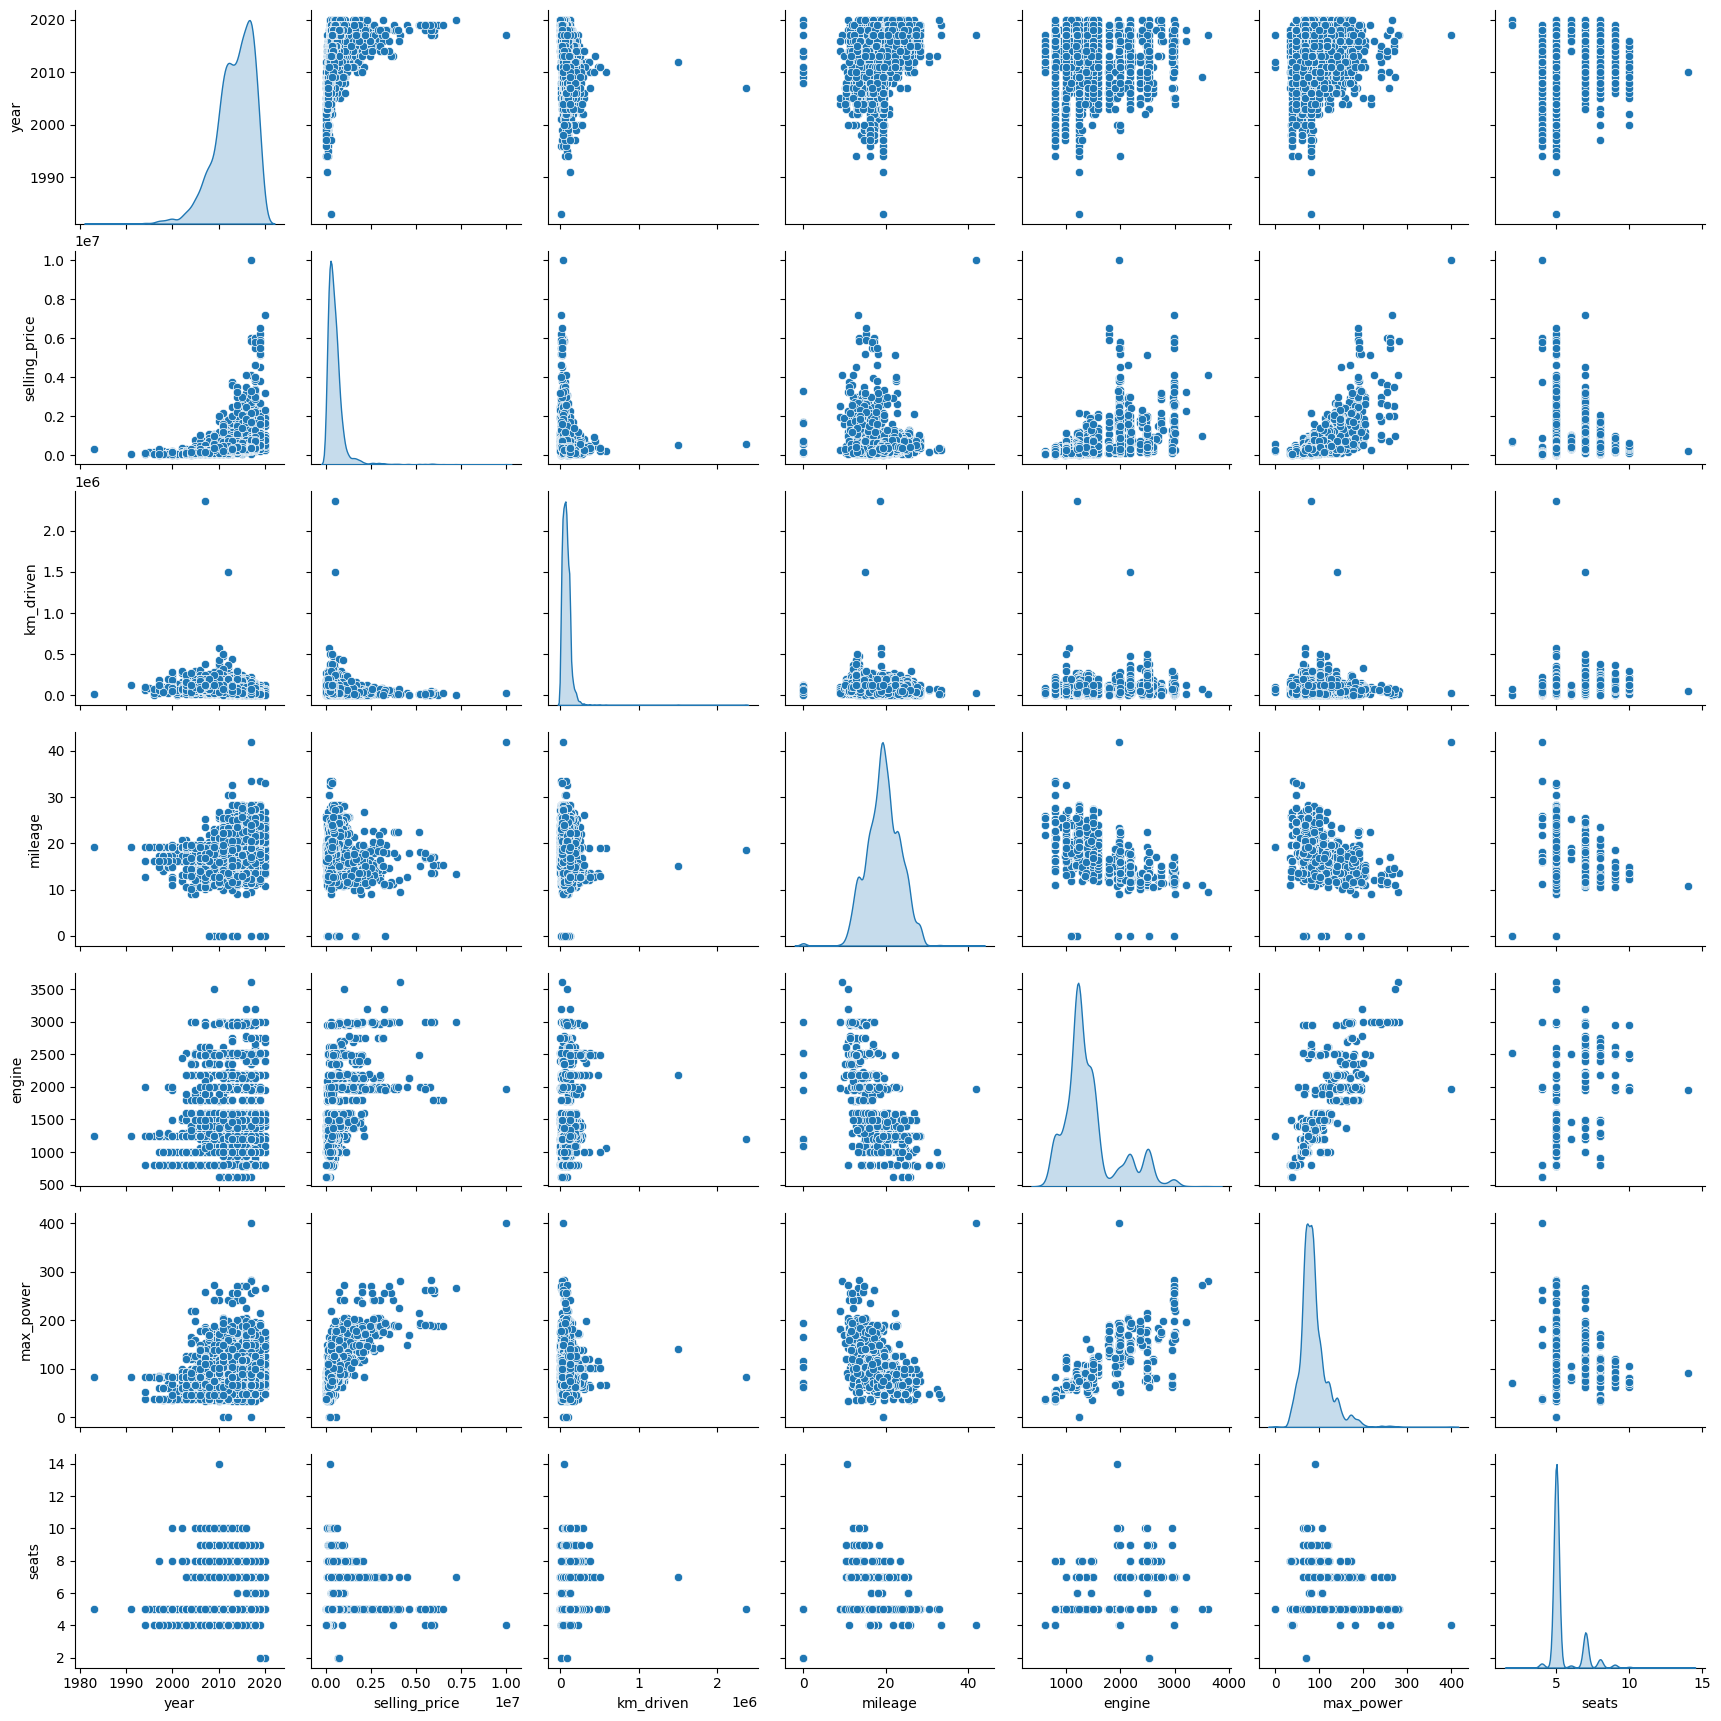

In [149]:
# Копия + удаляем нечисловые признаки
train_num = df_train.drop(columns=df_train.select_dtypes(include='object').columns)
# Pairplot для трейн
sns.pairplot(train_num, diag_kind='kde')
plt.show()

**Можно ли предположить на основе распределений связь признаков с целевой переменной?**

1.   year,engine, max_power "+"

2.   km_driven "-"

3.   mileage слабая обратная связь

4. seats явной сильной связи с ценой нет

**Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**

1.   "+" engine + max_power
2.   "-" year + km_driven, engine + mileage, max_power + mileage



Распределение selling_price сильно скошено вправо, логарифмирование целевой может улучшить модель. Есть выбросы по selling_price, km_driven, max_power.
Зависимости в основном нелинейные.




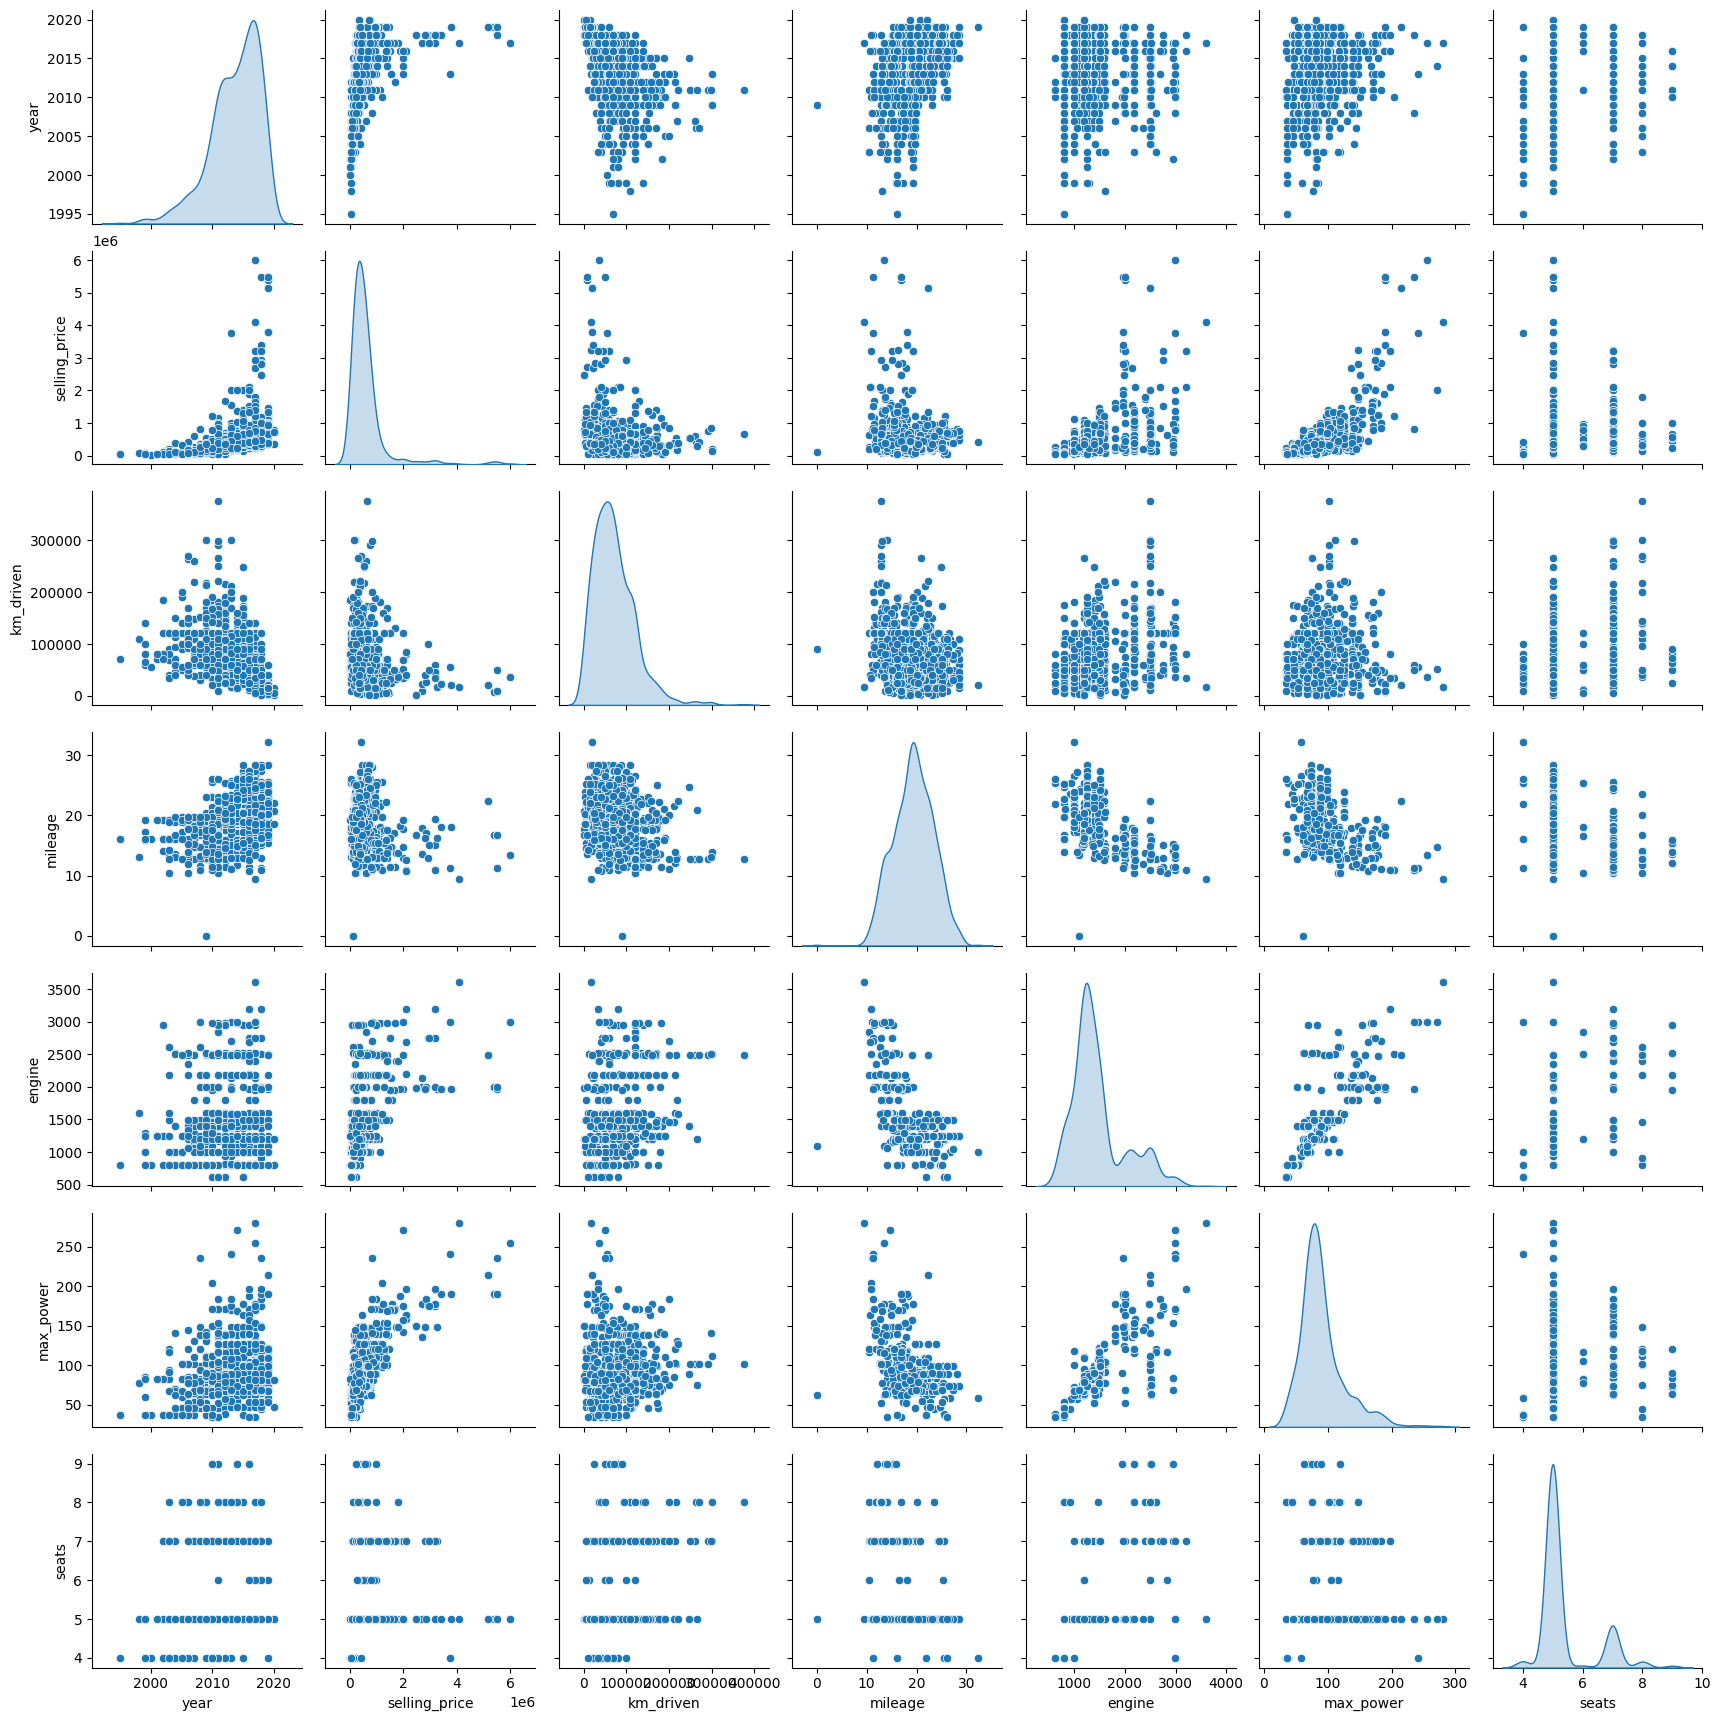

In [91]:
# Копия + удаляем нечисловые признаки
test_num = df_test.drop(columns=df_test.select_dtypes(include='object').columns)
# Pairplot для тест
sns.pairplot(test_num, diag_kind='kde')
plt.show()

**- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"**

Тенденции схожии.Вижу в тесте возможноную еще положительную связь year + mileage.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


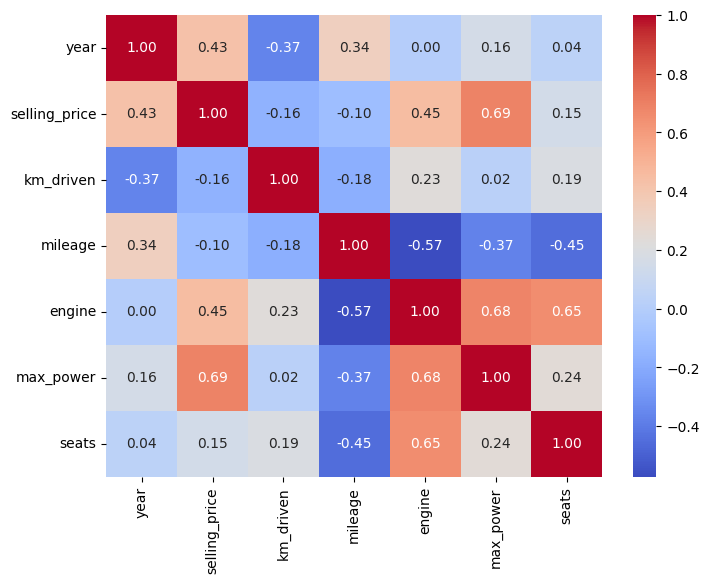

In [92]:
# корреляция Пирсона
corr = df_train.select_dtypes(include='number').corr()
# тепловая карта
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

 - **Какие 2 признака наименее скоррелированы между собой?**  
 year + engine (corr = 0)

- **Между какими наблюдается довольно сильная положительная линейная зависимость?**  

selling_price+max_power, engine+max_power, engine+seats

- **Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**  

да, видна отричательная корреляция

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

Добавим посмотреть зависимости с категориальными пеерменными.

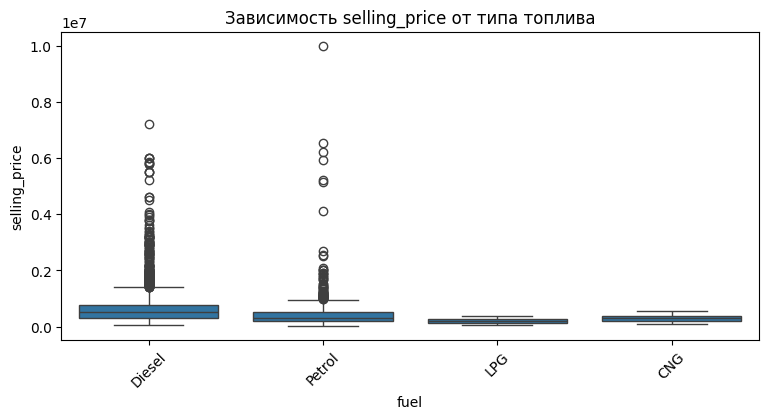

In [93]:
# Категориальные признаки с целевой
plt.figure(figsize=(9, 4))
sns.boxplot(x='fuel', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от типа топлива')
plt.xticks(rotation=45)
plt.show()

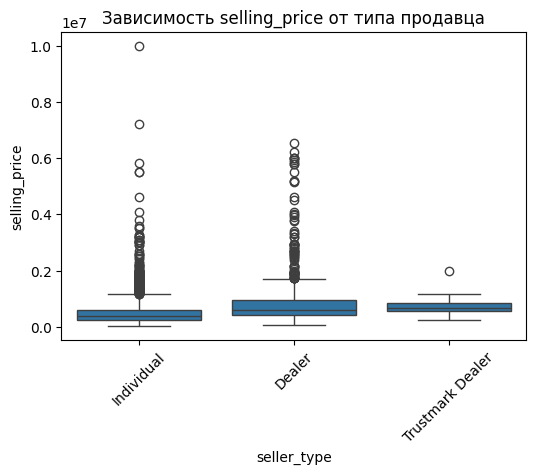

In [94]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='seller_type', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от типа продавца')
plt.xticks(rotation=45)
plt.show()


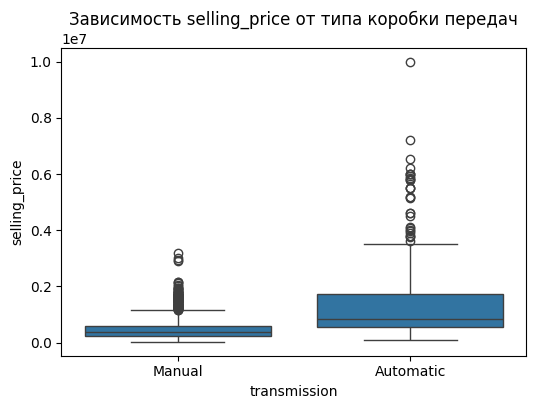

In [95]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='transmission', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от типа коробки передач')
plt.show()


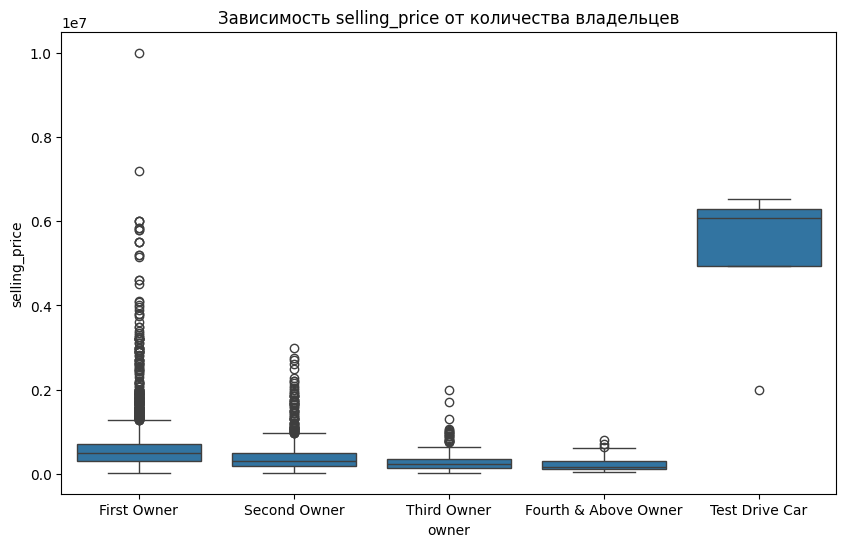

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=df_train)
plt.title('Зависимость selling_price от количества владельцев')
plt.show()


# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [97]:
# Копия
num_cols_train = df_train.select_dtypes(include='number').columns.tolist()
num_cols_train.remove('selling_price')
y_train = df_train['selling_price'].copy()
X_train = df_train[num_cols_train].copy()

In [98]:
# опишите выбранные вещественные признаки
num_cols_train

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [99]:
y_test = df_test['selling_price'].copy()
X_test = df_test[num_cols_train].copy()

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# обучаем модель
lr_raw = LinearRegression()
lr_raw.fit(X_train, y_train)

# предсказания
pred_train_lr_raw = lr_raw.predict(X_train)
pred_test_lr_raw = lr_raw.predict(X_test)

# метрики
metrics_lr_raw = {
    "R2_train": r2_score(y_train, pred_train_lr_raw),
    "R2_test": r2_score(y_test, pred_test_lr_raw),
    "MSE_train": MSE(y_train, pred_train_lr_raw),
    "MSE_test": MSE(y_test, pred_test_lr_raw)}

for name, value in metrics_lr_raw.items():
    print(f"{name}: {value:.3f}")


R2_train: 0.592
R2_test: 0.594
MSE_train: 116873067751.522
MSE_test: 233297548204.611


В данных есть выбросы, которые сильно влияют на MSE. R² почти одинаковый, но MSE_test в 2 раза выше, модель плохо предсказывает отдельные наблюдения с очень большими ошибками. Стоит логарифмировать целевую переменную, больште масштабы.

In [101]:
# Логарифмируем целевую переменную
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Обучаем Linear Regression на логарифме
lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)

# Предсказания
pred_train_lr_log = lr_log.predict(X_train)
pred_test_lr_log = lr_log.predict(X_test)

# Метрики
metrics_lr_log = {
    "R2_train": r2_score(y_train_log, pred_train_lr_log),
    "R2_test": r2_score(y_test_log, pred_test_lr_log),
    "MSE_train": MSE(y_train_log, pred_train_lr_log),
    "MSE_test": MSE(y_test_log, pred_test_lr_log)}

for name, value in metrics_lr_log.items():
    print(f"{name}: {value:.3f}")


R2_train: 0.824
R2_test: 0.859
MSE_train: 0.103
MSE_test: 0.101


Логарифмирование целевой значительно улучшило качество модели по сравнению с исходной регрессией. Модель стала более устойчивой к выбросам и несимметричному распределению цены.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# на стандартизированных данных
lr_scaled_log = LinearRegression()
lr_scaled_log.fit(X_train_scaled, y_train_log)
pred_train_lr_scaled_log = lr_scaled_log.predict(X_train_scaled)
pred_test_lr_scaled_log = lr_scaled_log.predict(X_test_scaled)

# Метрики
metrics_lr_scaled_log = {
    "R2_train": r2_score(y_train_log, pred_train_lr_scaled_log),
    "R2_test": r2_score(y_test_log, pred_test_lr_scaled_log),
    "MSE_train": MSE(y_train_log, pred_train_lr_scaled_log),
    "MSE_test": MSE(y_test_log, pred_test_lr_scaled_log)}

for name, value in metrics_lr_scaled_log.items():
    print(f"{name}: {value:.3f}")

R2_train: 0.824
R2_test: 0.859
MSE_train: 0.103
MSE_test: 0.101


Здесь мы видим, что результат не изменился после стандартизации на логарифмированном таргете

In [104]:
# Linear Regression на стандартизированных данных без логарифма
lr_scaled_no_log = LinearRegression()
lr_scaled_no_log.fit(X_train_scaled, y_train)
pred_train_lr_scaled_no_log = lr_scaled_no_log.predict(X_train_scaled)
pred_test_lr_scaled_no_log = lr_scaled_no_log.predict(X_test_scaled)

# Метрики
metrics_lr_scaled_no_log = {
    "R2_train": r2_score(y_train, pred_train_lr_scaled_no_log),
    "R2_test": r2_score(y_test, pred_test_lr_scaled_no_log),
    "MSE_train": MSE(y_train, pred_train_lr_scaled_no_log),
    "MSE_test": MSE(y_test, pred_test_lr_scaled_no_log)}

for name, value in metrics_lr_scaled_no_log.items():
    print(f"{name}: {value:.3f}")


R2_train: 0.592
R2_test: 0.594
MSE_train: 116873067751.522
MSE_test: 233297548204.603


тоже разницы особо нет, не повлияло (без лог)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [105]:
# коэффициенты модели на стандартизированных данных с логарифмом целевой
coef = pd.Series(lr_scaled_log.coef_, index=X_train.columns)
coef_sorted = coef.abs().sort_values(ascending=False)

coef_sorted

,0
year,0.459849
max_power,0.324290
engine,0.170932
mileage,0.086765
seats,0.032425
km_driven,0.013745


самый информативный тут год

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [106]:
from sklearn.linear_model import Lasso
#  Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество

lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train_scaled, y_train_log)
pred_train_lasso_model = lasso_model.predict(X_train_scaled)
pred_test_lasso_model = lasso_model.predict(X_test_scaled)
# Метрики
metrics_lasso_model = {
    "R2_train": r2_score(y_train_log, pred_train_lasso_model),
    "R2_test": r2_score(y_test_log, pred_test_lasso_model),
    "MSE_train": MSE(y_train_log, pred_train_lasso_model),
    "MSE_test": MSE(y_test_log, pred_test_lasso_model)}
for name, value in metrics_lasso_model.items():
    print(f"{name}: {value:.3f}")


R2_train: 0.822
R2_test: 0.857
MSE_train: 0.104
MSE_test: 0.103


До регуляризации:
R2_train: 0.824  
R2_test: 0.859  
MSE_train: 0.103  
MSE_test: 0.101  

L1-регуляризация не ухудшила и не улучшила существенно модель, что ожидаемо при малом α.

In [107]:
# Коэффициенты Lasso
coef_lasso_model = pd.Series(lasso_model.coef_, index=X_train.columns)
zero_coef_lasso = coef_lasso_model[coef_lasso_model == 0]
zero_coef_lasso

,0


Проверка zero_coef показала, что ни один коэффициент не занулся, α=0.01 слишком маленькое, чтобы отбросить признаки. Все признаки оказались достаточно информативными для предсказания.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [108]:
from sklearn.model_selection import GridSearchCV
# логарифмическая сетка alpha
param_grid = {"alpha": np.logspace(-4, 1, 15)}
lasso = Lasso(random_state=42, max_iter=10000)
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_log)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000, random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 2.27584593e-04, 5.17947468e-04, 1.17876863e-03,
       2.68269580e-03, 6.10540230e-03, 1.38949549e-02, 3.16227766e-02,
       7.19685673e-02, 1.63789371e-01, 3.72759372e-01, 8.48342898e-01,
       1.93069773e+00, 4.39397056e+00, 1.00000000e+01])},
             scoring='r2')

15 × 10 = 150 моделей грид-сёрчу пришлось обучать.  
Оптимальное значение коэффициента регуляризации α ~ 0.0027.  
регуляризация слабая, модель близка к линейной.

In [109]:
best_lasso = grid_search.best_estimator_
coef_lasso = pd.Series(best_lasso.coef_, index=X_train.columns)
zero_coef = coef_lasso[coef_lasso == 0]

zero_coef

,0


коэф. не занулились, признаки информативны.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [110]:
from sklearn.linear_model import ElasticNet
# Сетка гиперпараметров
param_grid = {
    "alpha": np.logspace(-4, 1, 10),
    "l1_ratio": np.linspace(0.1, 0.9, 9)}
# GridSearchCV
elastic_net = ElasticNet(max_iter=10000, random_state=42)
grid = GridSearchCV(
    elastic_net,
    param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1)

grid.fit(X_train_scaled, y_train_log)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='r2')

In [111]:
print("Лучшие параметры:", grid.best_params_)

Лучшие параметры: {'alpha': np.float64(0.004641588833612782), 'l1_ratio': np.float64(0.8)}


90 моделей × 10 фолдов = 900 моделей.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [112]:
df_train = df_train.drop(columns=['name'])
df_test = df_test.drop(columns=['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [113]:
# assert X_train_cat.shape == (5840, 10)

In [114]:
# X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [115]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# выбираем категориальные столбцы
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
cat_cols.append('seats')
df_all = pd.concat([df_train, df_test], axis=0)

# OneHot-кодирование
df_all_encoded = pd.get_dummies(df_all, columns=cat_cols, drop_first=True)
df_train_encoded = df_all_encoded.iloc[:len(df_train), :].copy()
df_test_encoded = df_all_encoded.iloc[len(df_train):, :].copy()

df_train_encoded.head(3)


,year,selling_price,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,450000,145500,23.40,1248,74.00,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,2014,370000,120000,21.14,1498,103.52,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,2010,225000,127000,23.00,1396,90.00,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [116]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# стандартизация
scaler_ridge = StandardScaler()
scaler_ridge.fit(df_train_encoded)
X_train_ridge = scaler_ridge.transform(df_train_encoded)
X_test_ridge = scaler_ridge.transform(df_test_encoded)
alpha_grid = np.logspace(-4, 1, 15)  # логарифмическая сетка
ridge = Ridge(random_state=42)
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid={"alpha": alpha_grid},
    cv=10,
    scoring="r2",
    n_jobs=-1)
grid_ridge.fit(X_train_ridge, y_train_log)

best_ridge = grid_ridge.best_estimator_
pred_train_ridge = best_ridge.predict(X_train_ridge)
pred_test_ridge = best_ridge.predict(X_test_ridge)
# метрики
metrics_ridge = {
    "R2_train": r2_score(y_train_log, pred_train_ridge),
    "R2_test": r2_score(y_test_log, pred_test_ridge),
    "MSE_train": MSE(y_train_log, pred_train_ridge),
    "MSE_test": MSE(y_test_log, pred_test_ridge),}
for name, value in metrics_ridge.items():
    print(f"{name}: {value:.3f}")


R2_train: 0.878
R2_test: 0.891
MSE_train: 0.071
MSE_test: 0.078


Было:  

R2_train: 0.822  
R2_test: 0.857  
MSE_train: 0.104  
MSE_test: 0.103  

Модель стала значительно точнее по сравнению с простой линейной регрессией на вещественных признаках, MSE уменьшилась почти в два раза.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [117]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs(y_pred - y_true) / y_true
    return (relative_error <= 0.10).mean()

business_scores = {
    "Linear (no log)": business_metric(y_test, pred_test_lr_raw),
    "Linear (log)": business_metric(y_test, np.expm1(pred_test_lr_log)),
    "Linear scaled (log)": business_metric(y_test, np.expm1(pred_test_lr_scaled_log)),
    "Lasso (log)": business_metric(y_test, np.expm1(pred_test_lasso_model)),
    "Ridge + OHE (log)": business_metric(y_test, np.expm1(pred_test_ridge))}
for model_name, score in business_scores.items():
    print(f"{model_name:25s}: {score:.5f}")

Linear (no log)          : 0.22700
Linear (log)             : 0.29400
Linear scaled (log)      : 0.29400
Lasso (log)              : 0.28000
Ridge + OHE (log)        : 0.36000


лучше всего решает задачу бизнеса **Ridge + OHE (log)**

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [118]:
import pickle
import os

# Создаем папку для модели
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
pickle_path = os.path.join(model_dir, "ridge_ohe_model.pkl")
#  Определяем признаки для модели
feature_names = [col for col in df_train_encoded.columns if col != 'selling_price']
model_data = {
    "scaler": scaler_ridge,
    "model": best_ridge,
    "feature_names": feature_names,
    "train_df": df_train}
#  Сохраняем
with open(pickle_path, "wb") as f:
    pickle.dump(model_data, f, protocol=pickle.HIGHEST_PROTOCOL)
#  Загружаем модель
with open(pickle_path, "rb") as f:
    loaded_data = pickle.load(f)

loaded_scaler = loaded_data["scaler"]
loaded_model = loaded_data["model"]
loaded_features = loaded_data["feature_names"]
loaded_train_df = loaded_data["train_df"]

In [119]:
# from google.colab import files
# files.download("models/ridge_ohe_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>